# sat - Summed Area Table (integral image)

## Synopse

The `sat` function is used to calculate from a given grayscale image, the summed area table (integral image).

- **g = iasat(f)**
    - **Output**
        - **g**: ndarray with the summed area table.
      
    - **Input**
        - **f**: ndarray with a grayscale image.
          

## Description

The Integral Image is used as a quick and effective way of calculating the sum of values 
(pixel values) in a given image or a rectangular subset of a grid (the given image). 
It can also, or is mainly, used for calculating the average intensity within a given image. 

In [16]:
def sat(f):
    return f.cumsum(axis=1).cumsum(axis=0)

def satarea(sat,r0_c0,r1_c1):
    a,b,c,d = 0,0,0,0
    r0,c0 = r0_c0
    r1,c1 = r1_c1
    if ((r0 - 1 >= 0) and (c0 - 1 >= 0)):
        a = sat[r0-1,c0-1]
    if (r0 - 1 >= 0):
        b = sat[r0-1,c1]
    if (c0 - 1 >= 0):
        c = sat[r1,c0-1]
    d = sat[r1,c1]
    return a + d - c - b


## Examples

In [1]:
testing = (__name__ == "__main__")
if testing:
    ! jupyter nbconvert --to python sat.ipynb
    %matplotlib inline
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia
    import matplotlib.image as mpimg

[NbConvertApp] Converting notebook sat.ipynb to python
[NbConvertApp] Writing 3803 bytes to sat.py


### Numerical example:

In [2]:
if testing:    
    f = np.array([[0,1,1,0,0,0,0,0,0],
                  [1,0,0,0,0,0,0,1,0],
                  [1,0,0,1,0,0,0,1,0],
                  [0,0,0,0,0,1,1,0,0]], dtype=np.uint8)

    s = ia.sat(f)
    print('f (input):\n',f)
    print('s (output):\n',s)
    a = ia.satarea(s,(0,0),(3,8))
    print('area:',a)

f (input):
 [[0 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 1 1 0 0]]
s (output):
 [[0 1 2 2 2 2 2 2 2]
 [1 2 3 3 3 3 3 4 4]
 [2 3 4 5 5 5 5 7 7]
 [2 3 4 5 5 6 7 9 9]]
area: 9.0


### Image example
    

""
Original Image
""
Integral Image

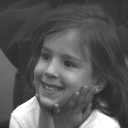
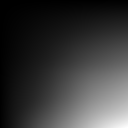

In [3]:
if testing:
    f = mpimg.imread('../data/lenina.pgm')[::2,::2]   
    nb = ia.nbshow(2)
    nb.nbshow(f, 'Original Image')
    nb.nbshow(ia.normalize(ia.sat(f)), 'Integral Image')
    nb.nbshow()

### Calculating a rectangle area with SAT (Summed Area Table)

In [4]:
if testing:
    f = mpimg.imread('../data/lenina.pgm')[::2,::2]
    H,W = f.shape
    s = ia.sat(f)
    a0 = ia.satarea(s,(0,0),(H-1,W-1))
    atopleft  = ia.satarea(s,(   0,0   ),(H//2-1,W//2-1))
    abotleft  = ia.satarea(s,(H//2,0   ),(H-1,   W//2-1))
    atopright = ia.satarea(s,(   0,W//2),(H//2-1,W-1))
    abotright = ia.satarea(s,(H//2,W//2),(H-1,   W-1))
    print('Area Total: ', a0)
    print('Area Top-left: ', atopleft)
    print('Area Bot-left: ', abotleft)
    print('Area Top-right: ', atopright)
    print('Area Bot-right: ', abotright)
    print('Area Total:', atopleft+abotleft+atopright+abotright)


Area Total:  1453842.0
Area Top-left:  287879.0
Area Bot-left:  462490.0
Area Top-right:  309879.0
Area Bot-right:  393594
Area Total: 1453842.0


## Equation

The summed area table is the sum of all the pixels above and to the left of ``(r, c)``, inclusive:

$$    s(r,c) = \sum_{r'=0}^{r}\sum_{c'=0}^{c} f(r',c') $$


It can be computed with a single pass over the image in a raster order scanning:
$$    
    s(r,c) = f(r,c) + s(r,c-1) + s(r-1,c) - s(r-1,c-1)
$$

To calculate the integral over a rectangle ``(r0,c0)-(r1,c1)``, you need to operate on just four points:

$$    \begin{array}{l}
    \sum_{r'=r_0}^{r_1}\sum_{c'=c_0}^{c_1} f(r',c') = s(r_0-1,c_0-1) - s(r_0-1,c_1) - s(r_1,c_0-1) + s(r_1,c_1)\\
    \\
    s(r,c)=0 \ \text{if}\ r < 0 \ \text{or}\ c < 0
    \end{array}
$$
- $f$ is the input image.
- $s$ is the summed area table array.

## References

- [Summed Area Table (Wikipedia)](http://en.wikipedia.org/wiki/Summed_area_table)
- [Computer Vision - The Integral Image](http://computersciencesource.wordpress.com/2010/09/03/computer-vision-the-integral-image/)

## See Also

- 

## Contributions

- João Marcos Gualtieri Beraquet, março de 2015